<center><h2><b>CIC-Darknet2020</b></h2></center>
<center><h2><b>Detection models</b></h2></center>

# Libraries importing and configuration

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from darknet.classification import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [14]:
random_state = 42
dataset_folder = "dataset/" 
img_folder = "imgs/"

np.random.seed(random_state)
plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams["savefig.format"] = 'pdf'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 18})

In [15]:
samples = pd.read_csv(dataset_folder + "darknet_dataset_processed_encoded.csv")
del samples['Label.1']
samples.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
1,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
2,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
3,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign
4,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Benign


# Benign vs Darknet classification

In [16]:
X, y, labels = split_train_target(samples, "Label")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
columns = samples.columns.tolist()

## Decision tree

100%|██████████| 10/10 [01:49<00:00, 10.99s/it]


       precision       recall       f1-score       support       
Benign:   99.94		99.92		99.93		784910.00		
Darknet:  99.64		99.71		99.67		163010.00		


 10-fold Accuracy: 99.89%
Test accuracy: 99.91%


Confusion matrix:
[[38661    18]
 [   22  7988]]

Benign :    99.94%
Darknet :   99.78%


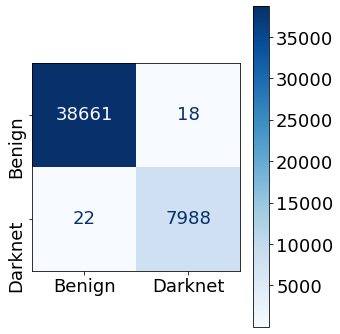

In [17]:
dt = DecisionTreeClassifier(random_state=random_state)
report_dt = evaluate_model(dt, X_train, y_train, X_test, y_test, labels, figsize=(5,5),rotation=(90, 0), fname="dt_conf_origin")

## Random forest

100%|██████████| 10/10 [05:39<00:00, 33.97s/it]


       precision       recall       f1-score       support       
Benign:   99.89		99.97		99.93		784910.00		
Darknet:  99.87		99.47		99.67		163010.00		


 10-fold Accuracy: 99.89%
Test accuracy: 99.90%


Confusion matrix:
[[38670     9]
 [   36  7974]]

Benign :    99.91%
Darknet :   99.89%


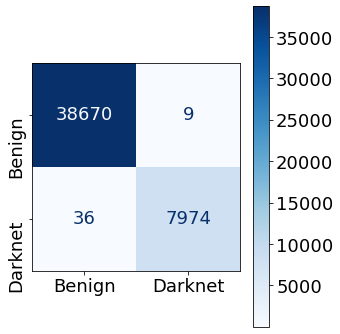

In [18]:
rf = RandomForestClassifier(random_state=random_state)
report_rf = evaluate_model(rf, X_train, y_train, X_test, y_test, labels, 
                           figsize=(5,5), rotation=(90, 0), fname="rf_conf_origin")